In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('3rd_data\한국전력공사_지역별 전기차 현황정보_20240731.csv')
df

,기준일,서울,인천,경기,강원,충북,충남,대전,세종,경북,대구,전북,전남,광주,경남,부산,울산,제주
0,2023-04-30,62385,29464,87779,15218,16996,19487,15301,3444,22349,26092,15852,19169,10028,26661,26191,6050,35020
1,2023-05-31,63807,30905,90624,15728,17511,20225,15564,3562,23023,26691,16256,19966,10303,27593,27147,6207,35619
2,2023-06-30,65614,32065,93995,16143,17903,20677,15904,3674,23520,27263,16668,20874,10609,28799,28466,6492,36262
3,2023-07-31,66528,33248,97738,16459,18100,21437,16138,3778,24347,27911,17302,21368,10853,30888,29037,6813,36903
4,2023-08-31,67351,34094,99925,16723,18739,21656,16263,3882,24645,28336,17623,21708,11054,31767,30148,6960,37342
5,2023-09-30,68892,35554,103704,17014,19095,22065,16559,4073,25051,28988,18187,22317,11318,32763,31096,7120,37689
6,2023-10-31,70194,36901,107342,17363,19416,23156,16841,4186,25664,29586,18658,22992,11757,34005,32418,7331,38098
7,2023-11-30,71591,38551,111466,17927,19713,23558,17418,4235,26234,30272,19390,23746,12235,35124,33770,7688,38894
8,2023-12-31,72937,40397,114117,18236,19972,24130,17889,4393,26776,30396,19795,24200,12538,36225,34643,7838,39418
9,2024-01-31,72877,40845,114735,18247,20003,24194,17981,4430,26934,30396,19827,24276,12529,36410,34789,7875,39439


In [10]:
df_melt = df.melt(id_vars=['기준일'],var_name='지역',value_name='자동차수')

In [12]:
df_melt.head()

,기준일,지역,자동차수
0,2023-04-30,서울,62385
1,2023-05-31,서울,63807
2,2023-06-30,서울,65614
3,2023-07-31,서울,66528
4,2023-08-31,서울,67351


In [13]:
# 파생변수, '년', '월'3rd_Pandas.ipynb
df_melt[['년', '월', '일']] = df_melt['기준일'].str.split('-',expand=True)
df_melt

,기준일,지역,자동차수,년,월,일
0,2023-04-30,서울,62385,2023,04,30
1,2023-05-31,서울,63807,2023,05,31
2,2023-06-30,서울,65614,2023,06,30
3,2023-07-31,서울,66528,2023,07,31
4,2023-08-31,서울,67351,2023,08,31
...,...,...,...,...,...,...
216,2023-12-31,제주,39418,2023,12,31
217,2024-01-31,제주,39439,2024,01,31
218,2024-05-31,제주,41519,2024,05,31
219,2024-06-30,제주,42436,2024,06,30


In [14]:
df_melt['년도'] = df_melt['기준일'].str[:4]

In [15]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준일     221 non-null    object
 1   지역      221 non-null    object
 2   자동차수    221 non-null    int64 
 3   년       221 non-null    object
 4   월       221 non-null    object
 5   일       221 non-null    object
 6   년도      221 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.2+ KB


In [16]:
df_melt['년도']= df_melt['년도'].astype(int)

In [17]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준일     221 non-null    object
 1   지역      221 non-null    object
 2   자동차수    221 non-null    int64 
 3   년       221 non-null    object
 4   월       221 non-null    object
 5   일       221 non-null    object
 6   년도      221 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 12.2+ KB


## 1. 지역별, 연도별 분석

In [18]:
df_melt.groupby(['지역','년'])[['자동차수']].mean()

자동차수
지역 년                  
강원 2023   16756.777778
   2024   19032.250000
경기 2023  100743.333333
   2024  126903.000000
경남 2023   31536.111111
   2024   40523.750000
경북 2023   24623.222222
   2024   29210.500000
광주 2023   11188.333333
   2024   13262.500000
대구 2023   28392.777778
   2024   31693.000000
대전 2023   16430.777778
   2024   19073.750000
부산 2023   30324.000000
   2024   38274.500000
서울 2023   67699.888889
   2024   76797.750000
세종 2023    3914.111111
   2024    4695.500000
울산 2023    6944.333333
   2024    8463.000000
인천 2023   34575.444444
   2024   45187.750000
전남 2023   21815.555556
   2024   26836.250000
전북 2023   17747.888889
   2024   21420.750000
제주 2023   37249.444444
   2024   41627.750000
충남 2023   21821.222222
   2024   26588.500000
충북 2023   18605.000000
   2024   21675.750000

In [21]:
# df_melt.groupby(['지역','년'])

year_tot = round(df_melt.pivot_table(index='지역',columns='년', values='자동차수',aggfunc='mean'),1)
year_tot

년,2023,2024
지역,,
강원,16756.8,19032.2
경기,100743.3,126903.0
경남,31536.1,40523.8
경북,24623.2,29210.5
광주,11188.3,13262.5
대구,28392.8,31693.0
대전,16430.8,19073.8
부산,30324.0,38274.5
서울,67699.9,76797.8


<Axes: xlabel='지역'>

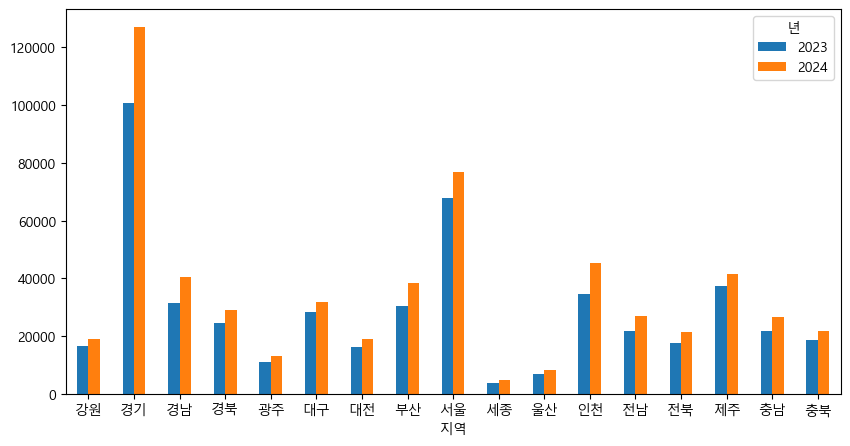

In [63]:
# 막대그래프, pandas.plot

year_tot.plot(kind='bar', figsize=(10,5), rot=0)



## 2023년 데이터 분석 : 지역별, 월별 통계

In [22]:
df_melt.head()


,기준일,지역,자동차수,년,월,일,년도
0,2023-04-30,서울,62385,2023,04,30,2023
1,2023-05-31,서울,63807,2023,05,31,2023
2,2023-06-30,서울,65614,2023,06,30,2023
3,2023-07-31,서울,66528,2023,07,31,2023
4,2023-08-31,서울,67351,2023,08,31,2023


In [23]:
df_melt['년'].unique()

array(['2023', '2024'], dtype=object)

In [35]:
# 2023년 데이터 검색
# 방법 1: df[조건식]
# 방법 2 : df.query('조건식')


df_melt_2023 = df_melt[df_melt['년']=='2023']
df_melt_2023

,기준일,지역,자동차수,년,월,일,년도
0,2023-04-30,서울,62385,2023,04,30,2023
1,2023-05-31,서울,63807,2023,05,31,2023
2,2023-06-30,서울,65614,2023,06,30,2023
3,2023-07-31,서울,66528,2023,07,31,2023
4,2023-08-31,서울,67351,2023,08,31,2023
...,...,...,...,...,...,...,...
212,2023-08-31,제주,37342,2023,08,31,2023
213,2023-09-30,제주,37689,2023,09,30,2023
214,2023-10-31,제주,38098,2023,10,31,2023
215,2023-11-30,제주,38894,2023,11,30,2023


In [30]:
df_melt.query("년=='2023'")

,기준일,지역,자동차수,년,월,일,년도
0,2023-04-30,서울,62385,2023,04,30,2023
1,2023-05-31,서울,63807,2023,05,31,2023
2,2023-06-30,서울,65614,2023,06,30,2023
3,2023-07-31,서울,66528,2023,07,31,2023
4,2023-08-31,서울,67351,2023,08,31,2023
...,...,...,...,...,...,...,...
212,2023-08-31,제주,37342,2023,08,31,2023
213,2023-09-30,제주,37689,2023,09,30,2023
214,2023-10-31,제주,38098,2023,10,31,2023
215,2023-11-30,제주,38894,2023,11,30,2023


In [37]:
# pivot table, 지역별 월별 자동차수 평균

df_2023= df_melt.pivot_table(index='지역', columns='월', values='자동차수',aggfunc='mean')

<Axes: xlabel='지역'>

C:\Users\baekh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\baekh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\baekh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\baekh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: User

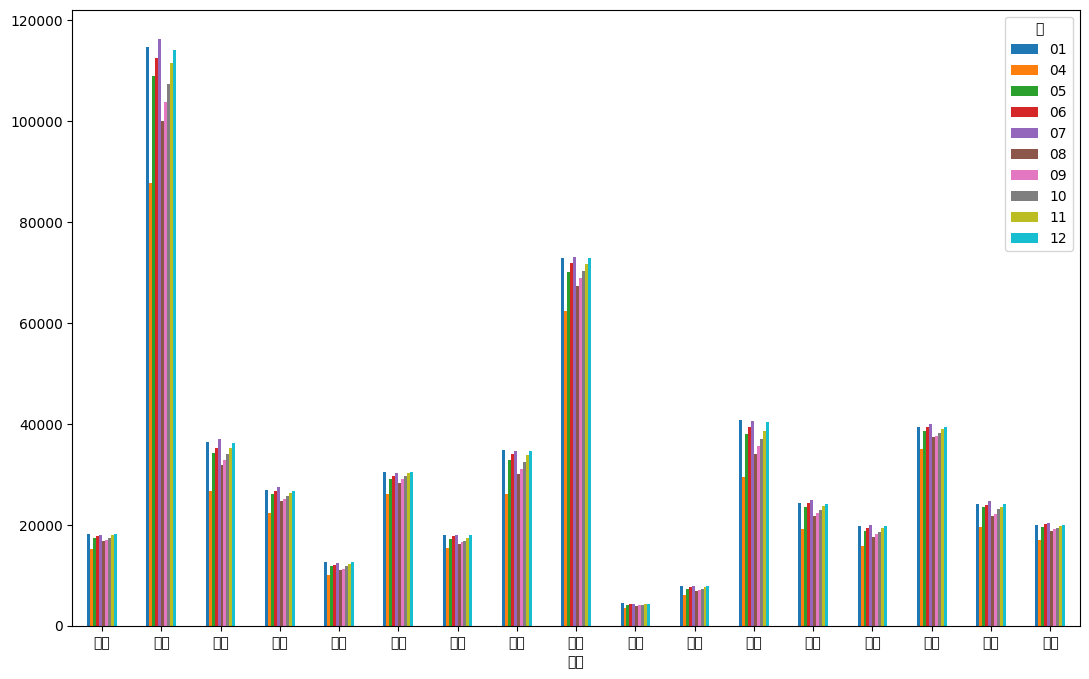

In [38]:
df_2023.plot(kind='bar', figsize=(13,8),rot=0)

In [39]:
# 2023년 지역별 월별 통계

df_2023.head()

월,01,04,05,06,07,08,09,10,11,12
지역,,,,,,,,,,
강원,18247.0,15218.0,17365.5,17705.5,18035.0,16723.0,17014.0,17363.0,17927.0,18236.0
경기,114735.0,87779.0,108861.0,112516.5,116239.5,99925.0,103704.0,107342.0,111466.0,114117.0
경남,36410.0,26661.0,34223.5,35308.5,36950.5,31767.0,32763.0,34005.0,35124.0,36225.0
경북,26934.0,22349.0,26141.5,26679.0,27578.5,24645.0,25051.0,25664.0,26234.0,26776.0
광주,12529.0,10028.0,11759.5,12047.0,12336.5,11054.0,11318.0,11757.0,12235.0,12538.0


In [43]:
temp = df_2023.query("지역=='경기'")
temp

월,01,04,05,06,07,08,09,10,11,12
지역,,,,,,,,,,
경기,114735.0,87779.0,108861.0,112516.5,116239.5,99925.0,103704.0,107342.0,111466.0,114117.0


검색가능한 지역들 : ['서울', '인천', '경기', '강원', '충북', '충남', '대전', '세종', '경북', '대구', '전북', '전남', '광주', '경남', '부산', '울산', '제주'] 


<Axes: title={'center': '서울 현황'}, xlabel='월'>

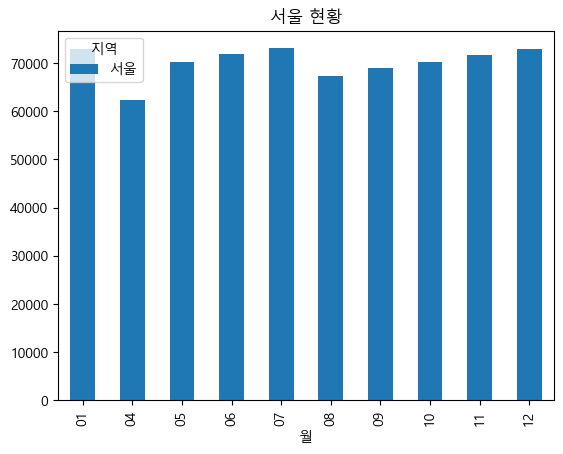

In [62]:
import matplotlib.pyplot as plt

plt.rc('font', family='malgun gothic')
sidata = list(df_melt['지역'].unique())
print(f'검색가능한 지역들 : {sidata} ')
searchin = input('지역입력>> ')
temp = df_2023[df_2023.index==searchin]
temp = temp.T
temp.plot(kind='bar',title=searchin+' 현황')

In [57]:
df_2023.head()

월,01,04,05,06,07,08,09,10,11,12
지역,,,,,,,,,,
강원,18247.0,15218.0,17365.5,17705.5,18035.0,16723.0,17014.0,17363.0,17927.0,18236.0
경기,114735.0,87779.0,108861.0,112516.5,116239.5,99925.0,103704.0,107342.0,111466.0,114117.0
경남,36410.0,26661.0,34223.5,35308.5,36950.5,31767.0,32763.0,34005.0,35124.0,36225.0
경북,26934.0,22349.0,26141.5,26679.0,27578.5,24645.0,25051.0,25664.0,26234.0,26776.0
광주,12529.0,10028.0,11759.5,12047.0,12336.5,11054.0,11318.0,11757.0,12235.0,12538.0


## 2024년 분기별 분석

In [66]:
# 2024년 데이터 추출

df_2024 = df_melt.query("년도==2024")
df_2024.info

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 9 to 220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준일     68 non-null     object
 1   지역      68 non-null     object
 2   자동차수    68 non-null     int64 
 3   년       68 non-null     object
 4   월       68 non-null     object
 5   일       68 non-null     object
 6   년도      68 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 4.2+ KB


In [69]:
# 월의 데이터 타입을 정수로 전환

df_2024['월'] = df_2024['월'].astype(int)

C:\Users\baekh\AppData\Local\Temp\ipykernel_20264\3968651601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['월'] = df_2024['월'].astype(int)


In [71]:
# 사용자 정의 함수 분기 계산

def get_quarter(month):
    if month >= 1 and month <=3:
        return '1분기'
    elif 4<=month<=6:
        return '2분기'
    elif 7<=month<=9:
        return '3분기'
    elif 10<=month<=12:
        return '4분기'
    else:
        return '잘못된 값'
    
df_2024['분기']=df_2024['월'].map(get_quarter)

C:\Users\baekh\AppData\Local\Temp\ipykernel_20264\1537542306.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['분기']=df_2024['월'].map(get_quarter)


In [72]:
# lambda 이용한 분기 계싼

df_2024['분기_2']=df_2024['월'].map(lambda month : '1분기' if 1<=month<=3 else
                                 '2분기' if 4<=month<=6 else
                                 '3분기' if 7<=month<=9 else
                                 '4분기' if 10<=month<=12 else
                                 '잘못된 값')

C:\Users\baekh\AppData\Local\Temp\ipykernel_20264\4202566097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['분기_2']=df_2024['월'].map(lambda month : '1분기' if 1<=month<=3 else


In [73]:
df_2024.head()

,기준일,지역,자동차수,년,월,일,년도,분기,분기_2
9,2024-01-31,서울,72877,2024,1,31,2024,1분기,1분기
10,2024-05-31,서울,76551,2024,5,31,2024,2분기,2분기
11,2024-06-30,서울,78215,2024,6,30,2024,2분기,2분기
12,2024-07-31,서울,79548,2024,7,31,2024,3분기,3분기
22,2024-01-31,인천,40845,2024,1,31,2024,1분기,1분기


In [76]:
df_2024_pivot= df_2024.pivot_table(index='지역',columns='분기',values='자동차수',aggfunc='mean')

<Axes: xlabel='지역'>

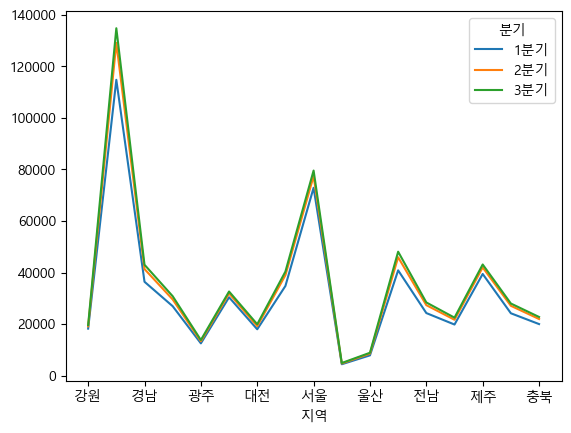

In [77]:
df_2024_pivot.plot()